In [118]:
from sklearn.datasets import make_moons

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)


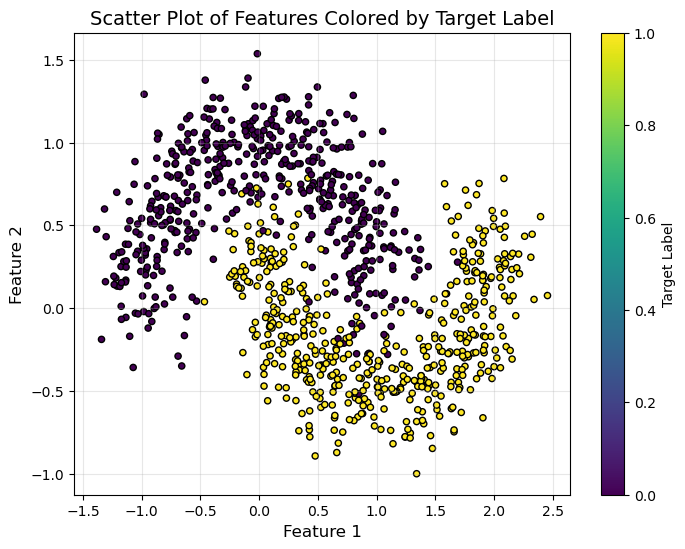

In [121]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Step 0: Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)

# Step 1: Produce a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20, edgecolor='k')
plt.title('Scatter Plot of Features Colored by Target Label', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.colorbar(label='Target Label')
plt.grid(alpha=0.3)
plt.show()


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

print("Training set shape:", X_train_normalized.shape, y_train.shape)
print("Testing set shape:", X_test_normalized.shape, y_test.shape)

Training set shape: (700, 2) (700,)
Testing set shape: (300, 2) (300,)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
gb_clf = GradientBoostingClassifier(random_state=0)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_normalized, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [50]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)

sorted_results = results[[
     "rank_test_score", 
     "mean_test_score", 
     "param_n_estimators",
     "param_learning_rate", 
     "param_max_depth", 
     "param_min_samples_leaf",
     "param_min_samples_split"
 ]].sort_values("rank_test_score")

# Print the sorted results
sorted_results

,rank_test_score,mean_test_score,param_n_estimators,param_learning_rate,param_max_depth,param_min_samples_leaf,param_min_samples_split
82,1,0.964286,100,0.10,3,1,2
195,1,0.964286,50,0.20,5,1,10
194,3,0.964286,200,0.20,5,1,5
215,4,0.962857,200,0.20,5,4,10
161,4,0.962857,200,0.10,7,4,10
...,...,...,...,...,...,...,...
12,235,0.902857,50,0.01,3,2,5
15,235,0.902857,50,0.01,3,2,10
21,235,0.902857,50,0.01,3,4,5
6,235,0.902857,50,0.01,3,1,10


In [52]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
GradientBoostingClassifier(random_state=0)

Best Parameters:
learning_rate: 0.1
max_depth: 3
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 100


In [54]:
from sklearn.metrics import accuracy_score

y_test_pred = best_model.predict(X_test_normalized)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.95


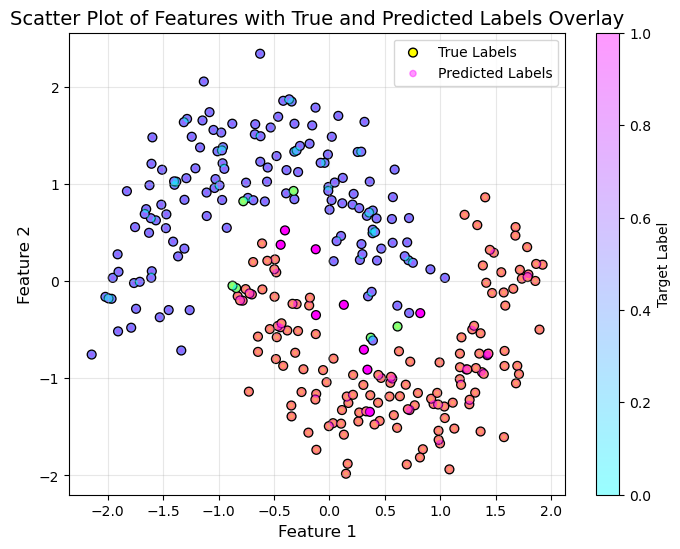

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_normalized[y_test == 0][:, 0], X_test_normalized[y_test == 0][:, 1], color='red', label='True Class 0')
plt.scatter(X_test_normalized[y_test == 1][:, 0], X_test_normalized[y_test == 1][:, 1], color='blue', label='True Class 1')

incorrect = y_test != y_pred
plt.scatter(X_test_normalized[incorrect][:, 0], X_test_normalized[incorrect][:, 1], facecolors='none', edgecolors='green', s=100, label='Incorrect Predictions')

plt.title('Test Data with Predictions Overlay')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [58]:
import pandas as pd

# URL for the raw spam dataset from the GitHub repository
url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/Spam.txt"

# Load the dataset
# The dataset is space-separated, so we use `delim_whitespace=True`
spam_data = pd.read_csv(url, header=0)

# Check the first few rows of the DataFrame
print(spam_data.head())

   test  word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0     1            0.00               0.64           0.64           0.0   
1     0            0.21               0.28           0.50           0.0   
2     1            0.06               0.00           0.71           0.0   
3     0            0.00               0.00           0.00           0.0   
4     0            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  ...  char_freq_;  char_freq_(  char_freq_[  char_freq_!  \
0             0.00  ...  

In [60]:
X = spam_data.drop(columns=['spam'])  
y = spam_data['spam']  

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

print("Training set shape:", X_train_normalized.shape, y_train.shape)
print("Testing set shape:", X_test_normalized.shape, y_test.shape)

Training set shape: (3220, 58) (3220,)
Testing set shape: (1381, 58) (1381,)


In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
gb_clf = GradientBoostingClassifier(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_features': ['sqrt', 'log2'],  
    'ccp_alpha': [0.0, 0.001, 0.01]
}


# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_normalized, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [77]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
sorted_results = results[[
     "rank_test_score", 
     "mean_test_score", 
     "param_n_estimators",
     "param_learning_rate", 
     "param_ccp_alpha", 
     "param_max_features"
 ]].sort_values("rank_test_score")
sorted_results

,rank_test_score,mean_test_score,param_n_estimators,param_learning_rate,param_ccp_alpha,param_max_features
17,1,0.950311,200,0.20,0.000,log2
11,2,0.948758,200,0.10,0.000,log2
13,3,0.947205,100,0.20,0.000,sqrt
14,4,0.946584,200,0.20,0.000,sqrt
16,5,0.946584,100,0.20,0.000,log2
10,6,0.945031,100,0.10,0.000,log2
8,6,0.945031,200,0.10,0.000,sqrt
7,8,0.943478,100,0.10,0.000,sqrt
12,9,0.943168,50,0.20,0.000,sqrt
15,10,0.942236,50,0.20,0.000,log2


In [80]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
GradientBoostingClassifier(learning_rate=0.2, max_features='log2',
                           n_estimators=200, random_state=0)

Best Parameters:
ccp_alpha: 0.0
learning_rate: 0.2
max_features: log2
n_estimators: 200


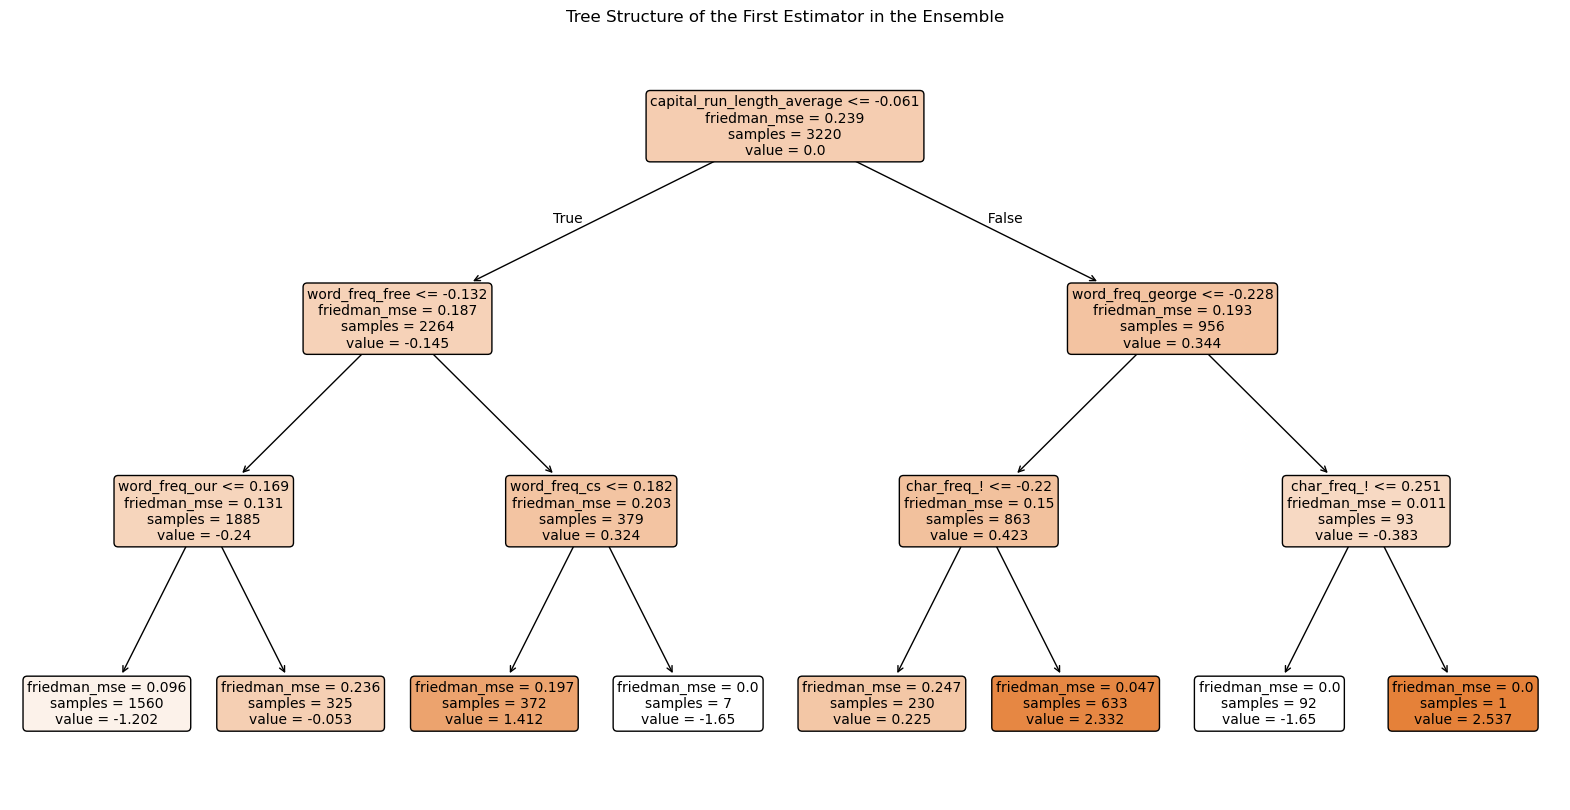

In [82]:
import matplotlib.pyplot as plt
from sklearn import tree

# Select one tree from the ensemble (for binary classification, we can use [0, 0])
estimator_tree = best_model.estimators_[0, 0]

plt.figure(figsize=(20, 10))
tree.plot_tree(estimator_tree,
               feature_names=X.columns,
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Tree Structure of the First Estimator in the Ensemble")
plt.show()

In [85]:
from sklearn.metrics import accuracy_score

y_test_pred = best_model.predict(X_test_normalized)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8645908761766835


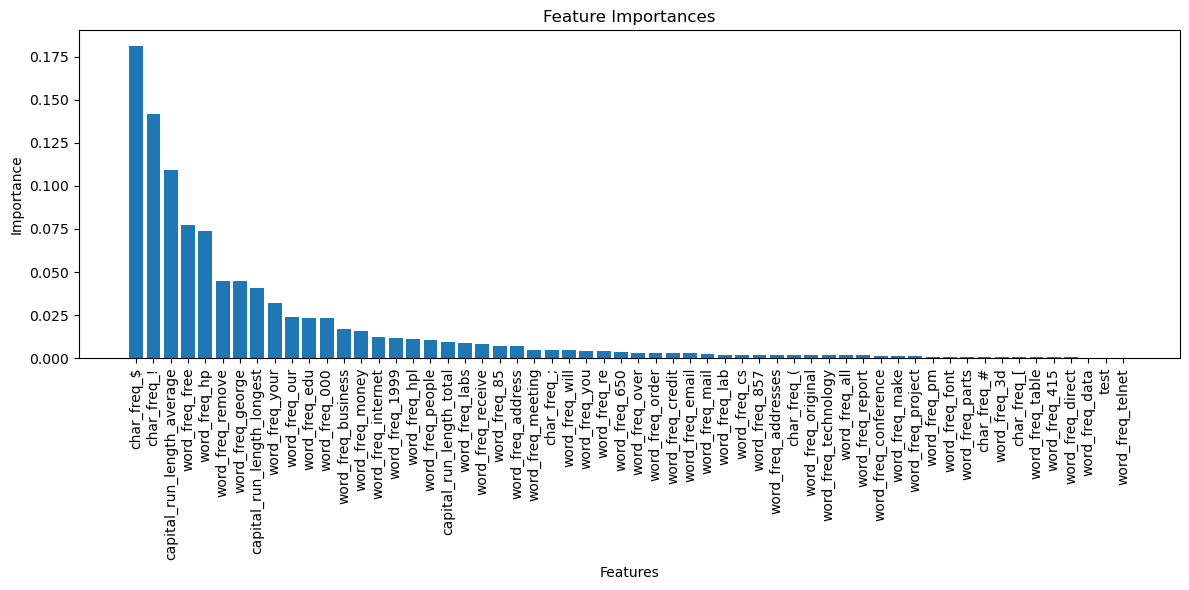

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from the best model
importances = best_model.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [90]:
import numpy as np

rng = np.random.RandomState(42)
X = np.atleast_2d(rng.uniform(0, 10.0, size=500)).T

Ey = X * np.sin(X)
Ey = Ey.ravel()

s = 0.5 + X.ravel() / 20
e = rng.lognormal(sigma=s) - np.exp(s**2 / 2)
y = Ey + e


Text(0, 0.5, 'y')

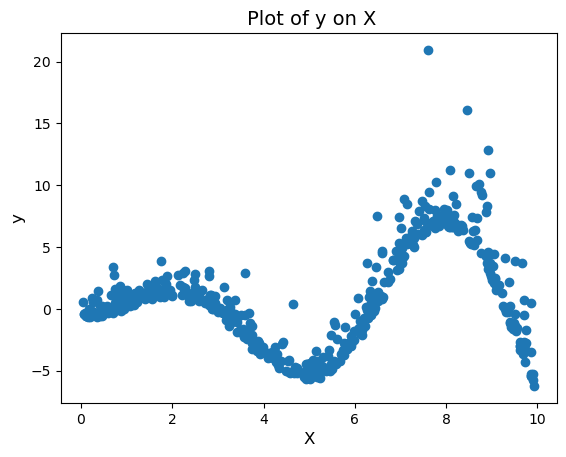

In [93]:
plt.scatter(X,y)
plt.title(' Plot of y on X', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train_normalized.shape, y_train.shape)
print("Testing set shape:", X_test_normalized.shape, y_test.shape)

Training set shape: (3220, 58) (350,)
Testing set shape: (1381, 58) (150,)


In [102]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
gb_reg = GradientBoostingRegressor(random_state=0)
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_reg,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [104]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
sorted_results = results[[
     "rank_test_score", 
     "mean_test_score", 
     "param_max_depth",
     "param_max_features", 
     "param_max_leaf_nodes", 
     "param_min_samples_split"
 ]].sort_values("rank_test_score")
sorted_results

,rank_test_score,mean_test_score,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split
35,1,-2.942067,3,sqrt,30,10
107,1,-2.942067,3,None,30,10
62,1,-2.942067,3,log2,20,10
53,1,-2.942067,3,log2,10,10
44,1,-2.942067,3,log2,None,10
...,...,...,...,...,...,...
253,319,-3.761640,7,log2,None,5
217,319,-3.761640,7,sqrt,None,5
252,322,-3.846581,7,log2,None,2
288,322,-3.846581,7,None,None,2


In [107]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
GradientBoostingRegressor(max_features='sqrt', min_samples_leaf=4,
                          min_samples_split=10, random_state=0)

Best Parameters:
max_depth: 3
max_features: sqrt
max_leaf_nodes: None
min_samples_leaf: 4
min_samples_split: 10


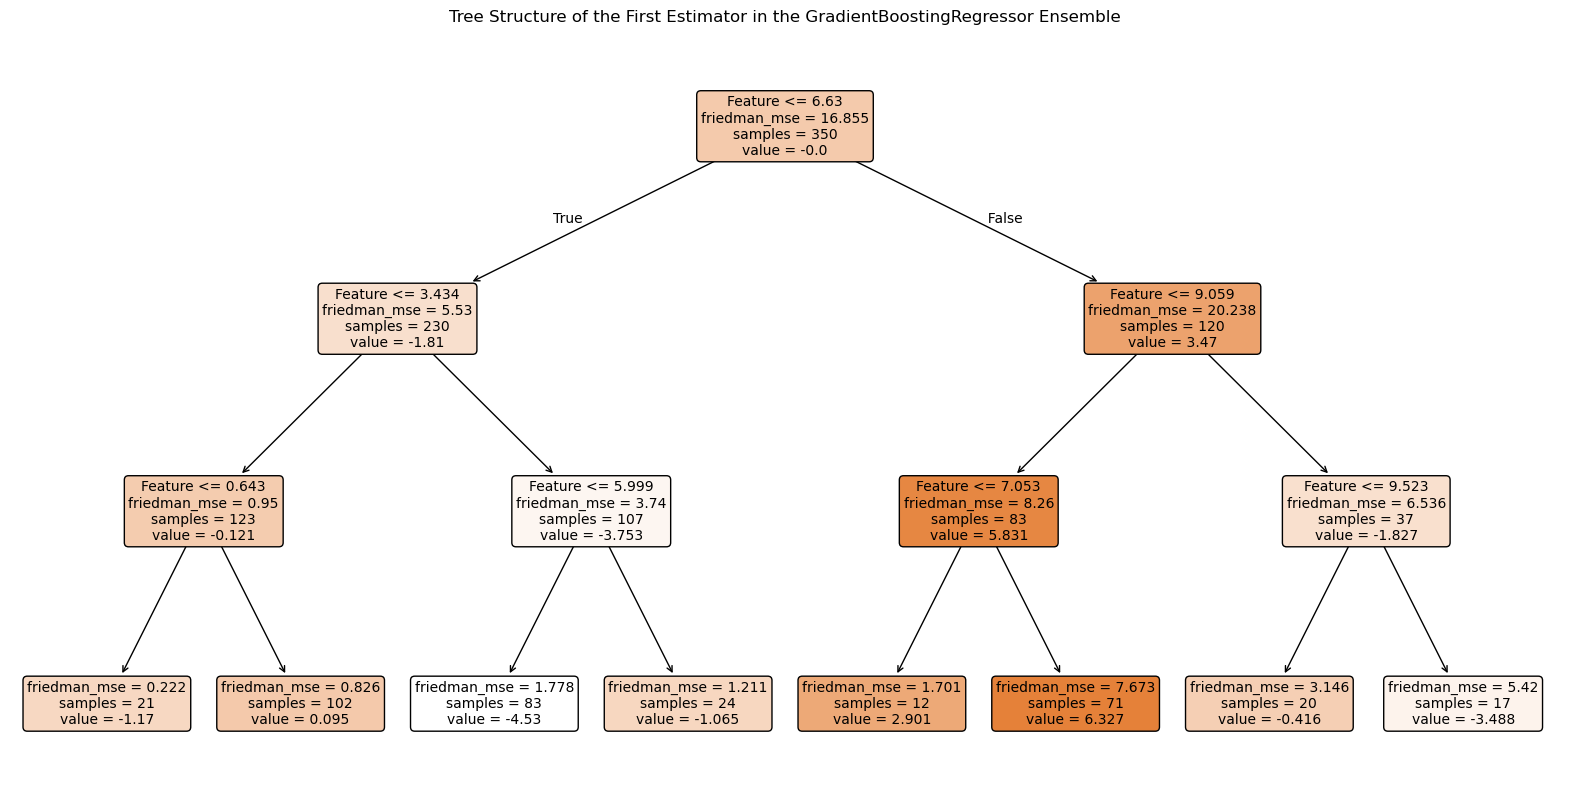

In [109]:
estimator_tree = best_model.estimators_[0, 0]

# Since our original X is a single feature, we'll name it accordingly.
feature_names = ["Feature"]

plt.figure(figsize=(20, 10))
tree.plot_tree(
    estimator_tree,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Tree Structure of the First Estimator in the GradientBoostingRegressor Ensemble")
plt.show()

In [114]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer, accuracy_score, mean_squared_error
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.4876873113953009


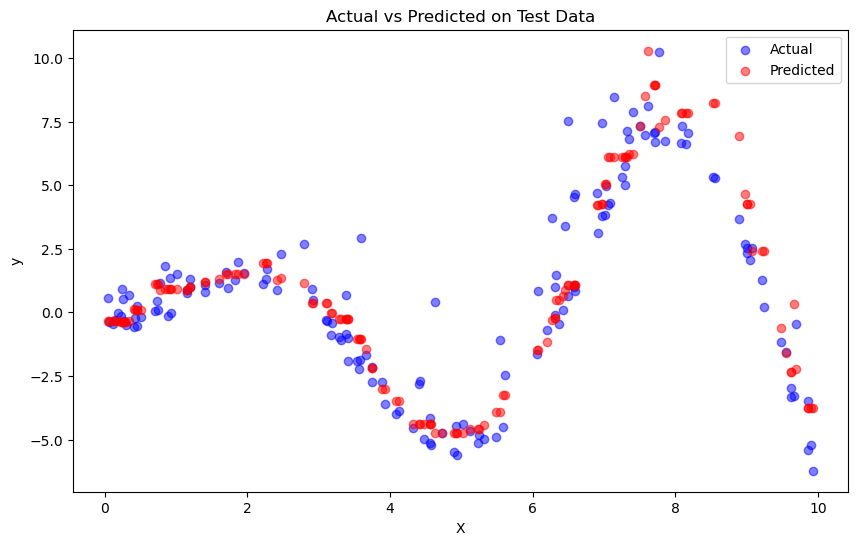

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted on Test Data')
plt.legend()
plt.show()